# Data Analysis Covid 19
## Fachreza Riyanda

In [1]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("dataset/covid_19_data.csv")
df

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [6]:
df.shape

(321, 6)

In [7]:
df.dtypes

Date         object
State        object
Region       object
Confirmed     int64
Deaths        int64
Recovered     int64
dtype: object

In [8]:
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [9]:
df.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [10]:
df.nunique()

Date           1
State        137
Region       187
Confirmed    282
Deaths       142
Recovered    195
dtype: int64

## Menampilkan jumlah kasus Terkonfirmasi, Kematian, dan Pemulihan di setiap wilayah

In [11]:
df.groupby('Region').sum()

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


## Negara dengan kasus terkonfirmasi tertinggi

In [12]:
df.groupby('Region')['Confirmed'].sum()

Region
Afghanistan           1939
Albania                766
Algeria               3848
Andorra                743
Angola                  27
                      ... 
West Bank and Gaza     344
Western Sahara           6
Yemen                    6
Zambia                  97
Zimbabwe                32
Name: Confirmed, Length: 187, dtype: int64

In [13]:
d2= df.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).head()
d2

Region
US        1039909
Spain      236899
Italy      203591
France     166543
UK         166441
Name: Confirmed, dtype: int64

<AxesSubplot:xlabel='Region'>

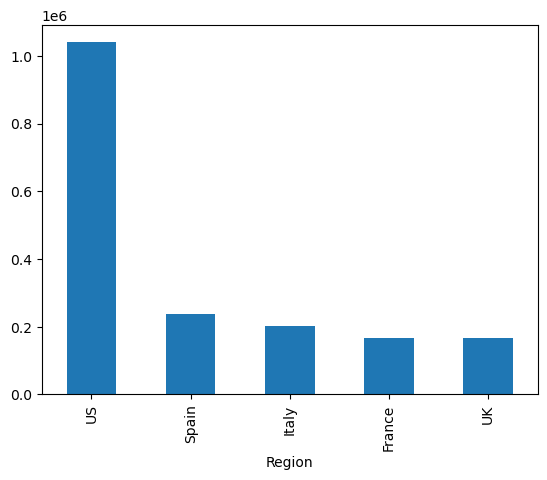

In [14]:
d2.plot(kind='bar')

## Jumlah Kematian Tertinggi

In [15]:
d1= df.groupby('Region')['Deaths'].sum().sort_values(ascending=False).head()
d1

Region
US        60967
Italy     27682
UK        26166
Spain     24275
France    24121
Name: Deaths, dtype: int64

<AxesSubplot:xlabel='Region'>

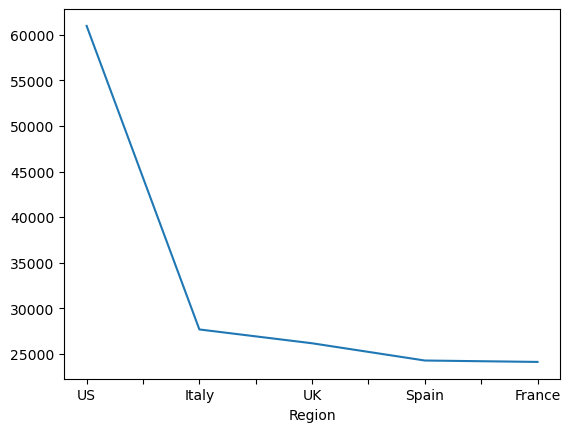

In [17]:
d1.plot()

## Presentase

In [18]:
death_percentage = (df['Deaths']/df['Confirmed'])*100

print(death_percentage)

death_percentage.sort_values(ascending=False)

0       3.094379
1       3.916449
2      11.538462
3       5.652759
4       7.407407
         ...    
316     1.284404
317     3.947368
318     0.000000
319     1.081081
320     0.078864
Length: 321, dtype: float64


203          inf
118    23.076923
98     22.222222
296    17.333333
194    16.666667
         ...    
289     0.000000
259     0.000000
204     0.000000
284          NaN
285          NaN
Length: 321, dtype: float64

In [19]:
recovered_percentage = (df['Recovered']/df['Confirmed'])*100

print(recovered_percentage)


0      12.996390
1      59.399478
2      44.230769
3      56.931359
4      25.925926
         ...    
316     0.000000
317    96.052632
318     0.000000
319    97.837838
320    99.605678
Length: 321, dtype: float64


## Menghapus semua catatan di mana Kasus Terkonfirmasi kurang dari 10

In [21]:
df['Confirmed'].sort_values(ascending=True).head(10)

285    0
284    0
203    0
305    1
289    1
184    3
192    5
272    5
288    6
178    6
Name: Confirmed, dtype: int64

In [22]:
df

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [23]:
df1=df[~(df['Confirmed']<10)]
df1

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


## Banyak kasus konfirmasi, Kematian & Pemulihan yang dilaporkan dari Nepal hingga 29 April 2020

In [24]:
df['Region'].nunique()

187

In [25]:
df[df['Region']=='Nepal']

,Date,State,Region,Confirmed,Deaths,Recovered
115,4/29/2020,NaN,Nepal,57,0,16


In [26]:
df[df['Region']=='US']

,Date,State,Region,Confirmed,Deaths,Recovered
181,4/29/2020,Alabama,US,6912,256,0
182,4/29/2020,Alaska,US,355,9,0
186,4/29/2020,Arizona,US,7209,308,0
187,4/29/2020,Arkansas,US,3193,57,0
195,4/29/2020,California,US,48747,1946,0
199,4/29/2020,Colorado,US,14758,766,0
200,4/29/2020,Connecticut,US,26767,2169,0
202,4/29/2020,Delaware,US,4655,144,0
204,4/29/2020,Diamond Princess cruise ship,US,49,0,0
205,4/29/2020,District of Columbia,US,4106,205,0


## Urutkan Nilai

In [27]:
df.sort_values(by='Confirmed',ascending = True)

,Date,State,Region,Confirmed,Deaths,Recovered
285,4/29/2020,Recovered,US,0,0,120720
284,4/29/2020,Recovered,Canada,0,0,20327
203,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0
305,4/29/2020,Tibet,Mainland China,1,0,1
289,4/29/2020,Saint Pierre and Miquelon,France,1,0,0
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


In [28]:
df.sort_values(by='Deaths',ascending = False).head(20)

,Date,State,Region,Confirmed,Deaths,Recovered
80,4/29/2020,NaN,Italy,203591,27682,71252
168,4/29/2020,NaN,UK,165221,26097,0
153,4/29/2020,NaN,Spain,236899,24275,132929
57,4/29/2020,NaN,France,165093,24087,48228
265,4/29/2020,New York,US,299691,23477,0
15,4/29/2020,NaN,Belgium,47859,7501,11283
262,4/29/2020,New Jersey,US,116365,6771,0
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
22,4/29/2020,NaN,Brazil,79685,5513,34132


In [29]:
df.groupby('Region').describe()

Confirmed                                              \
                       count    mean std     min     25%     50%     75%   
Region                                                                     
Afghanistan              1.0  1939.0 NaN  1939.0  1939.0  1939.0  1939.0   
Albania                  1.0   766.0 NaN   766.0   766.0   766.0   766.0   
Algeria                  1.0  3848.0 NaN  3848.0  3848.0  3848.0  3848.0   
Andorra                  1.0   743.0 NaN   743.0   743.0   743.0   743.0   
Angola                   1.0    27.0 NaN    27.0    27.0    27.0    27.0   
...                      ...     ...  ..     ...     ...     ...     ...   
West Bank and Gaza       1.0   344.0 NaN   344.0   344.0   344.0   344.0   
Western Sahara           1.0     6.0 NaN     6.0     6.0     6.0     6.0   
Yemen                    1.0     6.0 NaN     6.0     6.0     6.0     6.0   
Zambia                   1.0    97.0 NaN    97.0    97.0    97.0    97.0   
Zimbabwe                 1.0    32.0 NaN    32.0    32.0    32.0    32.0   

                           Deaths         ...               Recovered          \
                       max  count   mean  ...    75%    max     count    mean   
Region                                    ...                                   
Afghanistan         1939.0    1.0   60.0  ...   60.0   60.0       1.0   252.0   
Albania              766.0    1.0   30.0  ...   30.0   30.0       1.0   455.0   
Algeria             3848.0    1.0  444.0  ...  444.0  444.0       1.0  1702.0   
Andorra              743.0    1.0   42.0  ...   42.0   42.0       1.0   423.0   
Angola                27.0    1.0    2.0  ...    2.0    2.0       1.0     7.0   
...                    ...    ...    ...  ...    ...    ...       ...     ...   
West Bank and Gaza   344.0    1.0    2.0  ...    2.0    2.0       1.0    71.0   
Western Sahara         6.0    1.0    0.0  ...    0.0    0.0       1.0     5.0   
Yemen                  6.0    1.0    0.0  ...    0.0    0.0       1.0     1.0   
Zambia                97.0    1.0    3.0  ...    3.0    3.0       1.0    54.0   
Zimbabwe              32.0    1.0    4.0  ...    4.0    4.0       1.0     5.0   

                                                                
                   std     min     25%     50%     75%     max  
Region                                                          
Afghanistan        NaN   252.0   252.0   252.0   252.0   252.0  
Albania            NaN   455.0   455.0   455.0   455.0   455.0  
Algeria            NaN  1702.0  1702.0  1702.0  1702.0  1702.0  
Andorra            NaN   423.0   423.0   423.0   423.0   423.0  
Angola             NaN     7.0     7.0     7.0     7.0     7.0  
...                 ..     ...     ...     ...     ...     ...  
West Bank and Gaza NaN    71.0    71.0    71.0    71.0    71.0  
Western Sahara     NaN     5.0     5.0     5.0     5.0     5.0  
Yemen              NaN     1.0     1.0     1.0     1.0     1.0  
Zambia             NaN    54.0    54.0    54.0    54.0    54.0  
Zimbabwe           NaN     5.0     5.0     5.0     5.0     5.0  

[187 rows x 24 columns]

In [30]:
pd.set_option('display.max.rows',187)

In [31]:
d2=df.groupby('Region').describe()
d2

Confirmed                               \
                                     count           mean           std   
Region                                                                    
Afghanistan                            1.0    1939.000000           NaN   
Albania                                1.0     766.000000           NaN   
Algeria                                1.0    3848.000000           NaN   
Andorra                                1.0     743.000000           NaN   
Angola                                 1.0      27.000000           NaN   
Antigua and Barbuda                    1.0      24.000000           NaN   
Argentina                              1.0    4285.000000           NaN   
Armenia                                1.0    1932.000000           NaN   
Australia                              8.0     844.000000    990.844085   
Austria                                1.0   15402.000000           NaN   
Azerbaijan                             1.0    1766.000000           NaN   
Bahamas                                1.0      80.000000           NaN   
Bahrain                                1.0    2921.000000           NaN   
Bangladesh                             1.0    7103.000000           NaN   
Barbados                               1.0      80.000000           NaN   
Belarus                                1.0   13181.000000           NaN   
Belgium                                1.0   47859.000000           NaN   
Belize                                 1.0      18.000000           NaN   
Benin                                  1.0      64.000000           NaN   
Bhutan                                 1.0       7.000000           NaN   
Bolivia                                1.0    1110.000000           NaN   
Bosnia and Herzegovina                 1.0    1677.000000           NaN   
Botswana                               1.0      23.000000           NaN   
Brazil                                 1.0   79685.000000           NaN   
Brunei                                 1.0     138.000000           NaN   
Bulgaria                               1.0    1447.000000           NaN   
Burkina Faso                           1.0     641.000000           NaN   
Burma                                  1.0     150.000000           NaN   
Burundi                                1.0      11.000000           NaN   
Cabo Verde                             1.0     114.000000           NaN   
Cambodia                               1.0     122.000000           NaN   
Cameroon                               1.0    1832.000000           NaN   
Canada                                15.0    3524.333333   7756.294989   
Central African Republic               1.0      50.000000           NaN   
Chad                                   1.0      52.000000           NaN   
Chile                                  1.0   14885.000000           NaN   
Colombia                               1.0    6207.000000           NaN   
Congo (Brazzaville)                    1.0     207.000000           NaN   
Congo (Kinshasa)                       1.0     491.000000           NaN   
Costa Rica                             1.0     713.000000           NaN   
Croatia                                1.0    2062.000000           NaN   
Cuba                                   1.0    1467.000000           NaN   
Cyprus                                 1.0     843.000000           NaN   
Czech Republic                         1.0    7579.000000           NaN   
Denmark                                3.0    3068.666667   5144.366271   
Diamond Princess                       1.0     712.000000           NaN   
Djibouti                               1.0    1077.000000           NaN   
Dominica                               1.0      16.000000           NaN   
Dominican Republic                     1.0    6652.000000           NaN   
Ecuador                                1.0   24675.000000           NaN   
Egypt                                  1.0    5268.000000 

In [32]:
d2['Confirmed'].sort_values(by='count',ascending = False).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
US,58.0,17929.465517,42614.404241,0.0,1562.75,4794.5,16627.0,299691.0
Mainland China,31.0,2672.967742,12155.377708,1.0,157.50,328.0,862.0,68128.0
Canada,15.0,3524.333333,7756.294989,0.0,12.00,258.0,1511.0,26610.0
France,11.0,15140.272727,49733.945981,1.0,28.00,125.0,297.5,165093.0
UK,11.0,15131.000000,49779.498208,3.0,11.50,73.0,227.0,165221.0
Australia,8.0,844.000000,990.844085,28.0,190.75,494.5,1115.0,3016.0
Netherlands,5.0,7799.600000,17330.913920,5.0,16.00,75.0,100.0,38802.0
Denmark,3.0,3068.666667,5144.366271,11.0,99.00,187.0,4597.5,9008.0
Pakistan,1.0,15525.000000,NaN,15525.0,15525.00,15525.0,15525.0,15525.0
